In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

import os

In [25]:
pd.set_option('display.width', 400)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 70)

In [26]:
column_names = 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', \
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'

(32560L,) (32560L,)
验证准确率： 0.860380835381
	验证集查准率： 0.807656395892
	验证集召回率： 0.551587807678
	验证集F1： 0.655501667172
[[ 0.51964823  0.48035177]
 [ 0.64648139  0.35351861]
 [ 0.60437533  0.39562467]
 ..., 
 [ 0.68911805  0.31088195]
 [ 0.78896012  0.21103988]
 [ 0.29099714  0.70900286]]
AUC = 0.9200491525


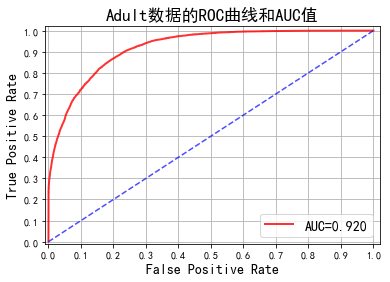

In [27]:
model_file = 'adult.pkl'
if os.path.exists(model_file):
    model = joblib.load(model_file)
else:
    show_result = True
    print u'读入数据'
    data = pd.read_csv('adult.data', header=None, names=column_names)
    
    for name in data.column_names:
        data[name] = pd.Categorical(data[name]).codes
    x = data[data.columns[:-1]]
    y = data[data.columns[-1]]
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, \
                                                       train_size=0.7, \
                                                       random_state=0)
    
    # 训练模型
    base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=3, \
                                           min_samples_split=5)
    model = AdaBoostClassifier(base_estimator=base_estimator, \
                              n_estimators=50, learning_rate=0.1)
    model.fit(x_train, y_train)
    joblib.dump(model, model_file)
    
    if show_result:
        y_train_pred = model.predict(x_train)
        print u'训练集准确率：', metrics.accuracy_score(y_train, y_train_pred)
        print u'\t训练集查准率：', metrics.precision_score(y_train, y_train_pred)
        print u'\t训练集召回率：', metrics.recall_score(y_train, y_train_pred)
        print u'\t训练集F1：', metrics.f1_score(y_train, y_train_pred)
        
        y_valid_pred = model.predict(x_valid)
        print u'验证准确率：', metrics.accuracy_score(y_valid, y_valid_pred)
        print u'\t验证集查准率：', metrics.precision_score(y_valid, y_valid_pred)
        print u'\t验证集召回率：', metrics.recall_score(y_valid, y_valid_pred)
        print u'\t验证集F1：', metrics.f1_score(y_valid, y_valid_pred)
        
data_test = pd.read_csv('adult.data', header=None, skiprows=1, names=column_names)
for name in data_test.columns:
    data_test[name] = pd.Categorical(data_test[name]).codes
x_test = data_test[data_test.columns[:-1]]
y_test = data_test[data_test.columns[-1]]
y_test_pred = model.predict(x_test)
print y_test.shape,y_test_pred.shape
print u'验证准确率：', metrics.accuracy_score(y_test, y_test_pred)
print u'\t验证集查准率：', metrics.precision_score(y_test, y_test_pred)
print u'\t验证集召回率：', metrics.recall_score(y_test, y_test_pred)
print u'\t验证集F1：', metrics.f1_score(y_test, y_test_pred)

y_test_proba = model.predict_proba(x_test)
print y_test_proba
y_test_proba = y_test_proba[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
auc = metrics.auc(fpr, tpr)
print 'AUC =', auc

# 绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

plt.plot(fpr, tpr, 'r-', lw=2, alpha=0.8, label='AUC=%.3f' % auc)
plt.plot((0,1), (0,1), c='b', lw=1.5, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid(b=True)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=14)
plt.title(u'Adult数据的ROC曲线和AUC值', fontsize=17)
plt.show()